# Project 8 -- Arnav Surve

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [14]:
library(data.table)

In [15]:
titles <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/titles.csv"))

In [16]:
episodes <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/episodes.csv"))

In [17]:
people <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/people.csv"))

In [18]:
ratings <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/ratings.csv"))

In [28]:
table(titles$is_adult)


      0       1 
7819057  245202 

In [47]:
head(titles)

,title_id,type,primary_title,original_title,is_adult,premiered,ended,runtime_minutes,genres
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,tt0000001,short,Carmencita,Carmencita,0,1894,NA,1,"Documentary,Short"
2,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NA,5,"Animation,Short"
3,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NA,4,"Animation,Comedy,Romance"
4,tt0000004,short,Un bon bock,Un bon bock,0,1892,NA,12,"Animation,Short"
5,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NA,1,"Comedy,Short"
6,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NA,1,Short


In [48]:
counts <- table(titles$is_adult, titles$type)

In [49]:
head(counts)

   
      movie radioEpisode radioSeries   short tvEpisode tvMiniSeries tvMovie
  0  572720            1           1  818056   5756012        38006  131910
  1    9011            0           0    1462    141373          179      92
   
    tvSeries tvShort tvSpecial   video videoGame
  0   208622   10133     33238  222005     28353
  1     1651       3        17   91265       149

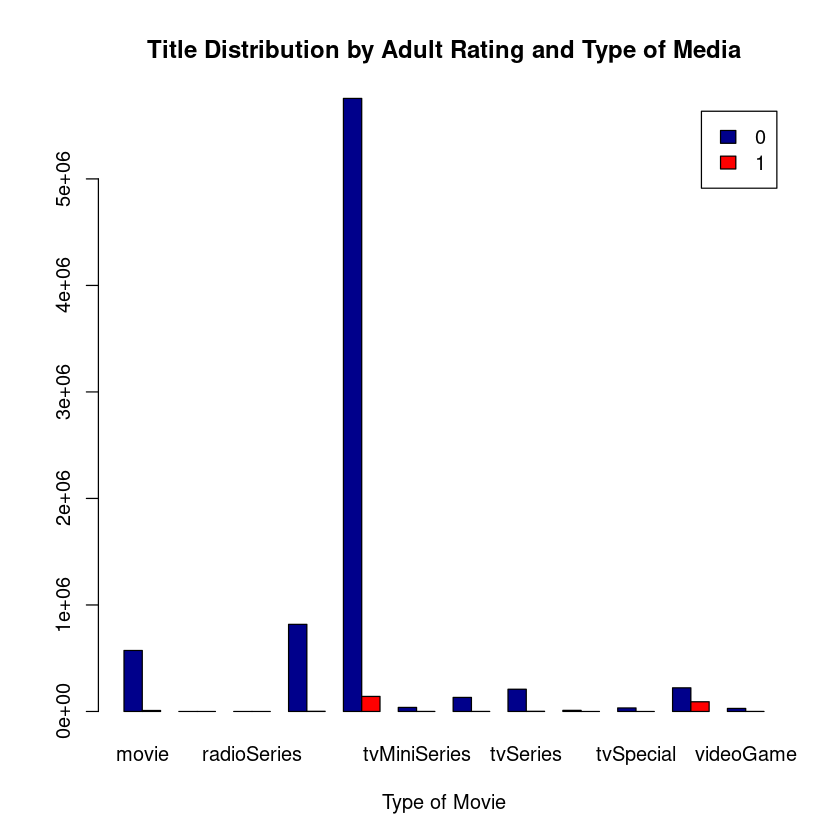

In [54]:
barplot(counts, main="Title Distribution by Adult Rating and Type of Media",
  xlab="Type of Movie", col=c("darkblue","red"),
  legend = rownames(counts), beside=TRUE)

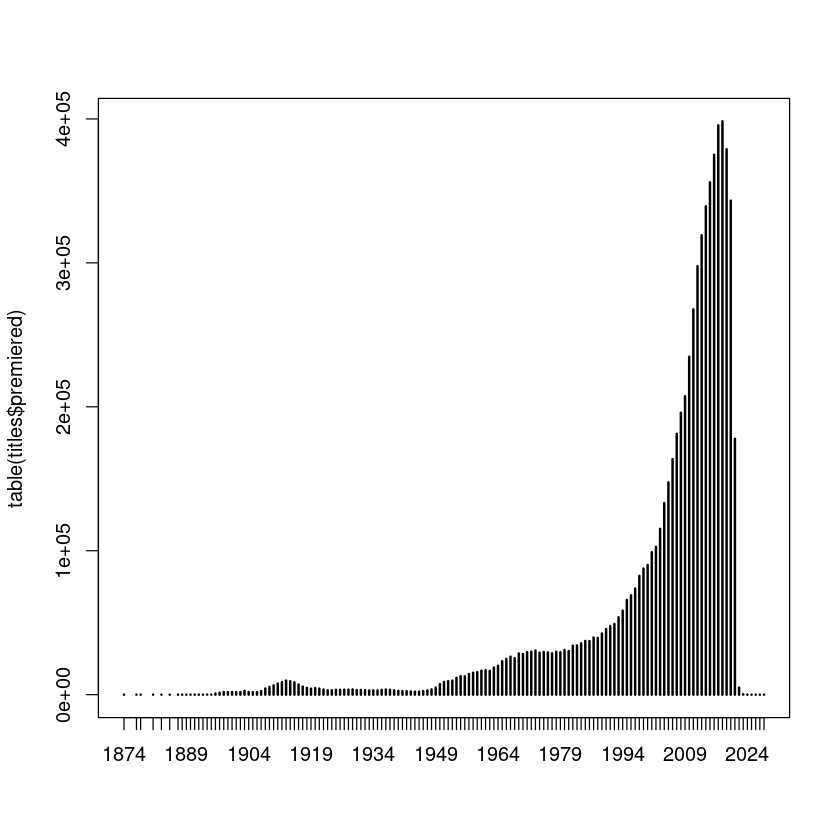

In [51]:
plot(table(titles$premiered))

a. Grouped bar chart in cell 50.

b. Line plot in cell 51.

c. From the grouped bar chart, we can observe that TV episodes have the most adult rated content in the dataset with videos having the second most. The line plot shows us that the number of movies premiered from 1874 to current have increased exponentially. 

## Question 2

In [55]:
find_movie_with_at_least_rating <- function(titles_df, ratings_df, ratings_of_at_least) {
    results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id")
    popular_movie_results <- results[results$type == "movie" & results$rating >= ratings_of_at_least, ]
    return(popular_movie_results)
}

## Question 3

In [58]:
find_movie_with_at_least_rating <- function(titles_df, ratings_df, ratings_of_at_least) { # Create a function that takes titles_df, ratings_df, and ratings_of_at_least as parameters
    results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id") # Merge ratings_df and titles_df rows where their title IDs match
    popular_movie_results <- results[results$type == "movie" & results$rating >= ratings_of_at_least, ] # Assign movies with a minimum rating to popular_movie_results
    return(popular_movie_results) # Return popular movie results as output of function
}

## Question 4

In [60]:
my_selection <- find_movie_with_at_least_rating(titles, ratings, 7.6)

In [64]:
dim(my_selection)

[1] 34340    11

In [71]:
find_movie_with_max_rating <- function(titles_df, ratings_df, ratings_max) {
    results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id")
    popular_movie_results <- results[results$type == "movie" & results$rating < ratings_max, ]
    return(popular_movie_results)
}

In [72]:
max_selection <- find_movie_with_max_rating(titles, ratings, 5.0)

In [73]:
dim(max_selection)

[1] 47203    11

a. In total, there are 34,340 movies with a rating of at least 7.6.

b. Refer to cells 67 & 69.

c. There are 47,203 movies with a rating lower than 5.0

## Question 5

In [105]:
find_highest_rating <- function(titles, ratings, genre) {
    results <- merge(ratings, titles, by.x = "title_id", by.y = "title_id")
    popular_movie_results <- results[results$type == "movie" & results$genres == genre, ]
    most_popular <- popular_movie_results[popular_movie_results$rating == max(popular_movie_results$rating), ]
    return(most_popular)
}

In [106]:
comedyDF <- find_highest_rating(titles, ratings, "Comedy")

In [107]:
comedyDF

,title_id,rating,votes,type,primary_title,original_title,is_adult,premiered,ended,runtime_minutes,genres
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
135262,tt0211363,9.4,5,movie,The Feather,The Feather,0,1929,NA,88,Romance


## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.